In [13]:

import numpy as np;
import math;
import matplotlib.pyplot as plt;


R_det = 42.76*10; ## detector ring radius [mm]
N_crystals = 12*3*(13+1); # 2*2 * 168, i.e. the angles (N_crystals / 2) are mashed once. 

d_angle = 2.0*np.pi / N_crystals; # circle center angle between adjacent crystal centers along ring. 
d_t = 2.0 * np.pi * R_det / N_crystals; ## distance between adjacent crystal centers along the ring
print("d_t=" + str(d_t)) ## should be about 4 [mm] 
extent = 200; #how far in radial direction

radial_spacing = np.empty(extent);  ## store calculated values. Note that Siemens uses interleaved sampling
circle_height = np.empty(extent); 

ro = 0;
print("N_crystals=" + str(N_crystals));

for i in range(0, extent//2):
    radial_spacing[2*i]=ro;
    circle_height[2*i] = math.sqrt(R_det**2 - ro**2);
    
    delta_ro = d_angle * math.sqrt(R_det**2.0 - ro**2.0); 

    radial_spacing[2*i+1] = ro + delta_ro/2;  # interleaved sampling, inbetween
    circle_height[2*i+1] = -circle_height[2*i]; #zig-zag pattern
    ro += delta_ro; # next direct sampling 
    
    
    #delta_ro = d_t * math.sqrt(1.0 - (ro/R_det)**2); #avoid numerical error by: 2*
    print("i=" + str(i));
    print("ro: " + str(ro) + ", " + str(delta_ro));
    print("circle: " + str(circle_height[i]));
    
print("extent=" + str(extent));  
print("diameter fov=" + str(radial_spacing[extent-1]+radial_spacing[extent-2]) + "mm");    

d_t=5.330734201091252
N_crystals=504
i=0
ro: 5.330734201091252, 5.330734201091252
circle: 427.59999999999997
i=1
ro: 10.661054142591764, 5.3303199415005125
circle: -427.59999999999997
i=2
ro: 15.990131240907022, 5.329077098315259
circle: 427.56677054335887
i=3
ro: 21.317136912319818, 5.327005671412795
circle: -427.56677054335887
i=4
ro: 26.641242701625778, 5.3241057893059605
circle: 427.4670770066026
i=5
ro: 31.96162041071832, 5.320377709092544
circle: -427.4670770066026
i=6
ro: 37.27744222710265, 5.3158218163843225
circle: 427.3009193798892
i=7
ro: 42.587880852318285, 5.310438625215638
circle: -427.3009193798892
i=8
ro: 47.8921096302497, 5.304228777931414
circle: 427.0683079717592
i=9
ro: 53.18930267530423, 5.2971930450545335
circle: -427.0683079717592
i=10
ro: 58.478635000436725, 5.28933232513249
circle: 426.7692634050782
i=11
ro: 63.759282644999935, 5.280647644563208
circle: -426.7692634050782
i=12
ro: 69.03042280239991, 5.271140157399975
circle: 426.4038166113445
i=13
ro: 74.291233

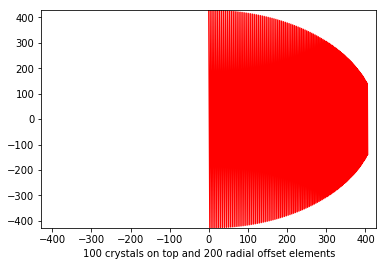

In [14]:
plt.plot(radial_spacing, circle_height, 'r');
plt.axis([-R_det, R_det, -R_det, R_det]);
plt.xlabel(str(extent//2) + " crystals on top and " + str(extent) + " radial offset elements" )
plt.show();